# Team members
Name: Harsh Agarwal  
Matrikelnummer: 7024725  
email: haag00001@stud.uni-saarland.de

Name: Zurana Mehrin Ruhi  
Matrikelnummer: 7023892  
email: zuru00001@stud.uni-saarland.de


In [2]:
import numpy as np
from activations import ReLU, LeakyReLU, Tanh, Softmax, Sigmoid
from losses import CrossEntropy, MSELoss
from layers import Linear
from layers import L2regularization, Dropout
from model import Model
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

You don't have to strictly follow the cell structure, but please keep the overall organisation of the notebook the same.

## 8.2.1 Stochastic Gradient Descent (1.5 points)
In this exercise you are given the PyTorch model and the training loop which uses Stochastic Gradient Descent. We train the model for 10 epochs with batch size equal to 4.   
Your task is to implement the same model using Model class which we got from the previous assignment. Use the same hyperparameters (batch size, number of epochs, learning rate) for training. Adapt the training process from the previous assignment so that it uses mini-batches instead of the loading the whole training set at once. You are expected to achieve the same performance on your model as with PyTorch model (around 80% accuracy on the test data after training for 10 epochs).   
Additionally, record both the training and test loss every 2000 minibatches both for PyTorch model and your model. Plot the loss graphs and comment on the differences between them (if any). For each model the graphs of train and test loss should be displayed on one plot.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),])
batch_size = 4


trainset = datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 200, bias=False)
        self.layer2 = nn.Linear(200, 80, bias=False)
        self.layer3 = nn.Linear(80, 10, bias=False)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        x = self.layer3(x)
        return x

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0)

In [ ]:
train_loss_pytorch = []
test_loss_pytorch = []

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_pytorch.append(running_loss / 2000)
            running_loss = 0.0

            with torch.no_grad():
                running_loss_test = 0.0
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    optimizer.zero_grad()
                    loss_test = criterion(outputs, labels)
                    running_loss_test += loss_test.item()
                test_loss_pytorch.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.307
[1,  4000] loss: 2.301
[1,  6000] loss: 2.300
[1,  8000] loss: 2.299
[1, 10000] loss: 2.298
[1, 12000] loss: 2.294
[1, 14000] loss: 2.296
[2,  2000] loss: 2.293
[2,  4000] loss: 2.290
[2,  6000] loss: 2.290
[2,  8000] loss: 2.288
[2, 10000] loss: 2.287
[2, 12000] loss: 2.284
[2, 14000] loss: 2.282
[3,  2000] loss: 2.277
[3,  4000] loss: 2.274
[3,  6000] loss: 2.270
[3,  8000] loss: 2.267
[3, 10000] loss: 2.259
[3, 12000] loss: 2.254
[3, 14000] loss: 2.246
[4,  2000] loss: 2.234
[4,  4000] loss: 2.221
[4,  6000] loss: 2.209
[4,  8000] loss: 2.193
[4, 10000] loss: 2.168
[4, 12000] loss: 2.147
[4, 14000] loss: 2.113
[5,  2000] loss: 2.063
[5,  4000] loss: 2.022
[5,  6000] loss: 1.972
[5,  8000] loss: 1.908
[5, 10000] loss: 1.864
[5, 12000] loss: 1.800
[5, 14000] loss: 1.733
[6,  2000] loss: 1.626
[6,  4000] loss: 1.575
[6,  6000] loss: 1.508
[6,  8000] loss: 1.437
[6, 10000] loss: 1.387
[6, 12000] loss: 1.352
[6, 14000] loss: 1.289
[7,  2000] loss: 1.214
[7,  4000] 

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 80 %


In [ ]:
from model import Model
np.random.seed(123)

# Your code for defining a model goes here

layer1 = Linear(784, 200)
activation1 = Sigmoid()
layer2 = Linear(200, 80)
activation2 = Sigmoid()
layer3 = Linear(80, 10)

loss = CrossEntropy()

In [53]:
train_loss_numpy = []
test_loss_numpy = []
# Train the model for 10 epochs using SGD
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = (inputs.reshape(batch_size, 784)).numpy()
        labels = np.eye(10)[labels.numpy()]

        m = Model([layer1, activation1, layer2, activation2, layer3])
        out = m.forward(inputs)
        current_loss = loss(out, labels)
        grads = m.backward(loss.grad())
        m.update_parameters(grads, 0.001)

        running_loss += current_loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_numpy.append(running_loss / 2000)
            running_loss = 0.0
            running_loss_test = 0
            
            for data in testloader:
                images, labels = data
                images = (images.reshape(batch_size, 784)).numpy()
                labels = np.eye(10)[labels.numpy()]

                outputs = m.forward(images)
                current_loss_test = loss(outputs, labels)
                running_loss_test += current_loss_test
            test_loss_numpy.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.299
[1,  6000] loss: 2.296
[1,  8000] loss: 2.295
[1, 10000] loss: 2.291
[1, 12000] loss: 2.289
[1, 14000] loss: 2.286
[2,  2000] loss: 2.281
[2,  4000] loss: 2.277
[2,  6000] loss: 2.271
[2,  8000] loss: 2.267
[2, 10000] loss: 2.261
[2, 12000] loss: 2.252
[2, 14000] loss: 2.244
[3,  2000] loss: 2.228
[3,  4000] loss: 2.214
[3,  6000] loss: 2.202
[3,  8000] loss: 2.180
[3, 10000] loss: 2.158
[3, 12000] loss: 2.133
[3, 14000] loss: 2.098
[4,  2000] loss: 2.033
[4,  4000] loss: 1.986
[4,  6000] loss: 1.919
[4,  8000] loss: 1.854
[4, 10000] loss: 1.783
[4, 12000] loss: 1.709
[4, 14000] loss: 1.643
[5,  2000] loss: 1.546
[5,  4000] loss: 1.467
[5,  6000] loss: 1.434
[5,  8000] loss: 1.378
[5, 10000] loss: 1.330
[5, 12000] loss: 1.285
[5, 14000] loss: 1.228
[6,  2000] loss: 1.169
[6,  4000] loss: 1.138
[6,  6000] loss: 1.118
[6,  8000] loss: 1.066
[6, 10000] loss: 1.049
[6, 12000] loss: 1.020
[6, 14000] loss: 0.996
[7,  2000] loss: 0.969
[7,  4000] 

In [54]:
# Evaluate the performance of the model by computing the accuracy on test data
correct = 0
total = 0

for data in testloader:
    images, labels = data

    images = (images.reshape(batch_size, 784)).numpy()
    labels = labels.numpy()

    outputs = m.forward(images)
    predicted = np.argmax(outputs, axis=1)
    total += labels.shape[0]
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


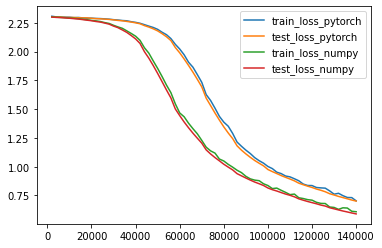

In [63]:
# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any)

x_axis = np.arange(2000, 2000*(len(test_loss_numpy)+1), 2000)

plt.plot(x_axis, train_loss_pytorch, label = "train_loss_pytorch")
plt.plot(x_axis, test_loss_pytorch, label = "test_loss_pytorch")
plt.plot(x_axis, train_loss_numpy, label = "train_loss_numpy")
plt.plot(x_axis, test_loss_numpy, label = "test_loss_numpy")

plt.legend()
plt.show()

## 8.5.2 Stochastic Gradient Descent with Momentum (1.5 points)
As it was discussed during the lecture, momentum helps to accelerate gradient in the right direction and helps to solve some problems related with optimization.  
Train the PyTorch model using SGD with Momentum while keeping other hyperparameters the same. Try to find the optimal value for momentum for the given problem (you can use the test data as validation data since it's more or less toy exercise).  
Implement the training with momentum for your Model class. Your code must be contained in sgd_momentum method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?  
Again, keep the record of train loss and test loss every 2000 minibatches for both models, plot them and comment on the differences between two models and between SGD with Momentum and without Momentum 

In [5]:
train_loss_pytorch_8_5_2 = []
test_loss_pytorch_8_5_2 = []

# incorporate momentum for training the PyTorch model
momentum = 0.9
net_8_5_2 = Net()

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net_8_5_2.parameters(), lr=0.001, momentum=momentum)

for epoch in range(10):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = net_8_5_2(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
          train_loss_pytorch_8_5_2.append(running_loss / 2000)
          running_loss = 0.0

          with torch.no_grad():
              running_loss_test = 0.0
              for data in testloader:
                  images, labels = data
                  outputs = net_8_5_2(images)
                  _, predicted = torch.max(outputs.data, 1)
                  optimizer.zero_grad()
                  loss_test = criterion(outputs, labels)
                  running_loss_test += loss_test.item()
              test_loss_pytorch_8_5_2.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.309
[1,  4000] loss: 2.283
[1,  6000] loss: 2.185
[1,  8000] loss: 1.755
[1, 10000] loss: 1.230
[1, 12000] loss: 0.952
[1, 14000] loss: 0.801
[2,  2000] loss: 0.625
[2,  4000] loss: 0.548
[2,  6000] loss: 0.517
[2,  8000] loss: 0.458
[2, 10000] loss: 0.441
[2, 12000] loss: 0.419
[2, 14000] loss: 0.400
[3,  2000] loss: 0.373
[3,  4000] loss: 0.368
[3,  6000] loss: 0.365
[3,  8000] loss: 0.363
[3, 10000] loss: 0.333
[3, 12000] loss: 0.334
[3, 14000] loss: 0.339
[4,  2000] loss: 0.307
[4,  4000] loss: 0.317
[4,  6000] loss: 0.325
[4,  8000] loss: 0.299
[4, 10000] loss: 0.307
[4, 12000] loss: 0.301
[4, 14000] loss: 0.303
[5,  2000] loss: 0.288
[5,  4000] loss: 0.287
[5,  6000] loss: 0.276
[5,  8000] loss: 0.284
[5, 10000] loss: 0.275
[5, 12000] loss: 0.261
[5, 14000] loss: 0.285
[6,  2000] loss: 0.264
[6,  4000] loss: 0.245
[6,  6000] loss: 0.254
[6,  8000] loss: 0.238
[6, 10000] loss: 0.255
[6, 12000] loss: 0.230
[6, 14000] loss: 0.245
[7,  2000] loss: 0.242
[7,  4000] 

In [6]:
train_loss_numpy_8_5_2 = []
test_loss_numpy_8_5_2 = []

# incorporate momentum for training your model
from model import Model
np.random.seed(123)

# Your code for defining a model goes here

reg_coeff = 0.01

layer1 = Linear(784, 200)
activation1 = Sigmoid()
layer2 = Linear(200, 80)
activation2 = Sigmoid()
layer3 = Linear(80, 10)

loss = CrossEntropy()

m_8_5_2 = Model([layer1, activation1, layer2, activation2, layer3])

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = (inputs.reshape(batch_size, 784)).numpy()
        labels = np.eye(10)[labels.numpy()]

        out = m_8_5_2.forward(inputs)
        current_loss = loss(out, labels)
        grads = m_8_5_2.backward(loss.grad())
        velocity = {i: np.zeros_like(grad) for i, grad in grads.items()}

        m_8_5_2.sgd_momentum(grads, 0.001, 0.9)

        running_loss += current_loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_numpy_8_5_2.append(running_loss / 2000)
            running_loss = 0.0
            running_loss_test = 0
            
            for data in testloader:
                images, labels = data
                images = (images.reshape(batch_size, 784)).numpy()
                labels = np.eye(10)[labels.numpy()]

                outputs = m_8_5_2.forward(images)
                current_loss_test = loss(outputs, labels)
                running_loss_test += current_loss_test
            test_loss_numpy_8_5_2.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.300
[1,  4000] loss: 2.237
[1,  6000] loss: 1.922
[1,  8000] loss: 1.332
[1, 10000] loss: 0.996
[1, 12000] loss: 0.831
[1, 14000] loss: 0.715
[2,  2000] loss: 0.578
[2,  4000] loss: 0.512
[2,  6000] loss: 0.468
[2,  8000] loss: 0.436
[2, 10000] loss: 0.419
[2, 12000] loss: 0.411
[2, 14000] loss: 0.378
[3,  2000] loss: 0.372
[3,  4000] loss: 0.355
[3,  6000] loss: 0.356
[3,  8000] loss: 0.337
[3, 10000] loss: 0.334
[3, 12000] loss: 0.319
[3, 14000] loss: 0.338
[4,  2000] loss: 0.314
[4,  4000] loss: 0.299
[4,  6000] loss: 0.320
[4,  8000] loss: 0.296
[4, 10000] loss: 0.304
[4, 12000] loss: 0.291
[4, 14000] loss: 0.282
[5,  2000] loss: 0.272
[5,  4000] loss: 0.288
[5,  6000] loss: 0.258
[5,  8000] loss: 0.272
[5, 10000] loss: 0.256
[5, 12000] loss: 0.266
[5, 14000] loss: 0.253
[6,  2000] loss: 0.244
[6,  4000] loss: 0.245
[6,  6000] loss: 0.232
[6,  8000] loss: 0.230
[6, 10000] loss: 0.236
[6, 12000] loss: 0.238
[6, 14000] loss: 0.240
[7,  2000] loss: 0.219
[7,  4000] 

Accuracy of the `pytorch` network on the 10000 test images: 94 %
Accuracy of the `numpy` network on the 10000 test images: 95 %


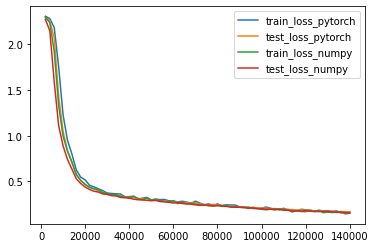

In [7]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_8_5_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the `pytorch` network on the 10000 test images: %d %%' % (
        100 * correct / total))

correct = 0
total = 0

for data in testloader:
    images, labels = data

    images = (images.reshape(batch_size, 784)).numpy()
    labels = labels.numpy()

    outputs = m_8_5_2.forward(images)
    predicted = np.argmax(outputs, axis=1)
    total += labels.shape[0]
    correct += (predicted == labels).sum().item()

print('Accuracy of the `numpy` network on the 10000 test images: %d %%' % (
        100 * correct / total))

# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any)

x_axis = np.arange(2000, 2000*(len(test_loss_numpy_8_5_2)+1), 2000)

plt.plot(x_axis, train_loss_pytorch_8_5_2, label = "train_loss_pytorch")
plt.plot(x_axis, test_loss_pytorch_8_5_2, label = "test_loss_pytorch")
plt.plot(x_axis, train_loss_numpy_8_5_2, label = "train_loss_numpy")
plt.plot(x_axis, test_loss_numpy_8_5_2, label = "test_loss_numpy")

plt.legend()
plt.show()


Yes, the accuracy for SGD with momentum improved for the same number of epochs trained.

Using SGD with momentum we see a quick drop in loss in the initial epochs as compared to SGD without momentum. As opposed to a classic SGD, SGD with momentum takes into account the running average of the gradients so it reduces the oscilation and converges quicker. 

## 8.5.3 AdaGrad (1.5 points)
Train the PyTorch model using AdaGram while keeping other hyperparameters the same  
Implement the training with AdaGrad for your Model class. Your code must be contained in to ada_grad method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?  
Again, keep the record of train loss and test loss after every 2000 minibatches for both models, plot them and comment on the differences between two models and between AdaGrad and the previous optimization techniques.

In [8]:
train_loss_pytorch_8_5_3 = []
test_loss_pytorch_8_5_3 = []
# incorporate AdaGrad for training the PyTorch model
net_8_5_3 = Net()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adagrad(net_8_5_3.parameters(), lr=0.001)

for epoch in range(10):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = net_8_5_3(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
          train_loss_pytorch_8_5_3.append(running_loss / 2000)
          running_loss = 0.0
          running_loss_test = 0
          
          with torch.no_grad():
              running_loss_test = 0.0
              for data in testloader:
                  images, labels = data
                  outputs = net_8_5_3(images)
                  _, predicted = torch.max(outputs.data, 1)
                  optimizer.zero_grad()
                  loss_test = criterion(outputs, labels)
                  running_loss_test += loss_test.item()
              test_loss_pytorch_8_5_3.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.208
[1,  4000] loss: 2.060
[1,  6000] loss: 1.921
[1,  8000] loss: 1.811
[1, 10000] loss: 1.704
[1, 12000] loss: 1.618
[1, 14000] loss: 1.538
[2,  2000] loss: 1.442
[2,  4000] loss: 1.384
[2,  6000] loss: 1.333
[2,  8000] loss: 1.287
[2, 10000] loss: 1.248
[2, 12000] loss: 1.210
[2, 14000] loss: 1.180
[3,  2000] loss: 1.123
[3,  4000] loss: 1.104
[3,  6000] loss: 1.087
[3,  8000] loss: 1.047
[3, 10000] loss: 1.031
[3, 12000] loss: 1.007
[3, 14000] loss: 0.994
[4,  2000] loss: 0.970
[4,  4000] loss: 0.949
[4,  6000] loss: 0.922
[4,  8000] loss: 0.905
[4, 10000] loss: 0.890
[4, 14000] loss: 0.882
[5,  2000] loss: 0.847
[5,  4000] loss: 0.840
[5,  6000] loss: 0.844
[5,  8000] loss: 0.828
[5, 10000] loss: 0.810
[5, 12000] loss: 0.788
[5, 14000] loss: 0.783
[6,  2000] loss: 0.771
[6,  4000] loss: 0.770
[6,  6000] loss: 0.763
[6,  8000] loss: 0.741
[6, 10000] loss: 0.744
[6, 12000] loss: 0.733
[6, 14000] loss: 0.723
[7,  2000] loss: 0.709
[7,  4000] loss: 0.708
[7,  6000] 

In [9]:
train_loss_numpy_8_5_3 = []
test_loss_numpy_8_5_3 = []

# incorporate AdaGrad for training your model
from model import Model
np.random.seed(123)

# Your code for defining a model goes here
layer1 = Linear(784, 200)
activation1 = Sigmoid()
layer2 = Linear(200, 80)
activation2 = Sigmoid()
layer3 = Linear(80, 10)

loss = CrossEntropy()

m_8_5_3 = Model([layer1, activation1, layer2, activation2, layer3])

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = (inputs.reshape(batch_size, 784)).numpy()
        labels = np.eye(10)[labels.numpy()]

        out = m_8_5_3.forward(inputs)
        current_loss = loss(out, labels)
        grads = m_8_5_3.backward(loss.grad())
        velocity = {i: np.zeros_like(grad) for i, grad in grads.items()}

        m_8_5_3.ada_grad(grads, 0.001)

        running_loss += current_loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_numpy_8_5_3.append(running_loss / 2000)
            running_loss = 0.0
            running_loss_test = 0
            for data in testloader:
                images, labels = data
                images = (images.reshape(batch_size, 784)).numpy()
                labels = np.eye(10)[labels.numpy()]

                outputs = m_8_5_3.forward(images)
                current_loss_test = loss(outputs, labels)
                running_loss_test += current_loss_test
            test_loss_numpy_8_5_3.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 2.039
[1,  6000] loss: 1.907
[1,  8000] loss: 1.796
[1, 10000] loss: 1.707
[1, 12000] loss: 1.627
[1, 14000] loss: 1.559
[2,  2000] loss: 1.481
[2,  4000] loss: 1.437
[2,  6000] loss: 1.380
[2,  8000] loss: 1.341
[2, 10000] loss: 1.301
[2, 12000] loss: 1.261
[2, 14000] loss: 1.225
[3,  2000] loss: 1.183
[3,  4000] loss: 1.157
[3,  6000] loss: 1.126
[3,  8000] loss: 1.104
[3, 10000] loss: 1.082
[3, 12000] loss: 1.052
[3, 14000] loss: 1.034
[4,  2000] loss: 0.997
[4,  4000] loss: 0.975
[4,  6000] loss: 0.961
[4,  8000] loss: 0.951
[4, 10000] loss: 0.946
[4, 12000] loss: 0.912
[4, 14000] loss: 0.905
[5,  2000] loss: 0.880
[5,  4000] loss: 0.870
[5,  6000] loss: 0.834
[5,  8000] loss: 0.850
[5, 10000] loss: 0.829
[5, 12000] loss: 0.829
[5, 14000] loss: 0.809
[6,  2000] loss: 0.793
[6,  4000] loss: 0.783
[6,  6000] loss: 0.787
[6,  8000] loss: 0.764
[6, 10000] loss: 0.755
[6, 12000] loss: 0.744
[6, 14000] loss: 0.738
[7,  2000] loss: 0.729
[7,  4000] 

In [17]:
n_t = [test_loss_numpy_8_5_3[0]]
for i in range(len(test_loss_numpy_8_5_3) - 1):
  n_t.append(test_loss_numpy_8_5_3[i+1] - test_loss_numpy_8_5_3[i])


Accuracy of the `pytorch` network on the 10000 test images: 87 %
Accuracy of the `numpy` network on the 10000 test images: 87 %


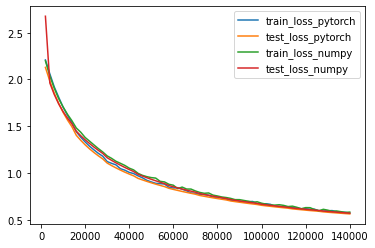

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_8_5_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the `pytorch` network on the 10000 test images: %d %%' % (
        100 * correct / total))

correct = 0
total = 0

for data in testloader:
    images, labels = data

    images = (images.reshape(batch_size, 784)).numpy()
    labels = labels.numpy()

    outputs = m_8_5_3.forward(images)
    predicted = np.argmax(outputs, axis=1)
    total += labels.shape[0]
    correct += (predicted == labels).sum().item()

print('Accuracy of the `numpy` network on the 10000 test images: %d %%' % (
        100 * correct / total))

# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any) between two models and between AdaGrad and the previous optimization techniques.

x_axis = np.arange(2000, 2000*(len(test_loss_numpy_8_5_3)+1), 2000)

plt.plot(x_axis, train_loss_pytorch_8_5_3, label = "train_loss_pytorch")
plt.plot(x_axis, test_loss_pytorch_8_5_3, label = "test_loss_pytorch")
plt.plot(x_axis, train_loss_numpy_8_5_3, label = "train_loss_numpy")
plt.plot(x_axis, test_loss_numpy_8_5_3, label = "test_loss_numpy")

plt.legend()
plt.show()

We see a reduction in acccuracy with Adagrad as compared to SGD with momentum. 

Major reason for this is that Adagrad works best when data is sparse, in such cases some features have more impact on the output than others. But with MNIST since it's more uniform, Adagrad is not too helpful here.

## 8.5.4 Adam (1.5 points)
Train the PyTorch model using Adam while keeping other hyperparameters the same  
Implement the training with Adam for your Model class. Your code must be contained in to adam method in model.py. You can change the arguments of the function according to your needs, but please keep the implementation there. 
Evaluate the performance of both models on test data. Did the accuracy improved for the same number of epochs trained?
Again, keep the record of train loss and test loss every 2000 minibatches for both models, plot them and comment on the differences between two models and between Adam and the previous optimization techniques.

In [19]:
beta1 = 0.9
beta2 = 0.999

In [20]:
train_loss_pytorch_8_5_4 = []
test_loss_pytorch_8_5_4 = []
# incorporate Adam for training the PyTorch model
net_8_5_4 = Net()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net_8_5_4.parameters(), lr=0.001, betas=(beta1, beta2))

for epoch in range(10):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()

      outputs = net_8_5_4(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
          train_loss_pytorch_8_5_4.append(running_loss / 2000)
          running_loss = 0.0

          with torch.no_grad():
              running_loss_test = 0.0
              for data in testloader:
                  images, labels = data
                  outputs = net_8_5_4(images)
                  _, predicted = torch.max(outputs.data, 1)
                  optimizer.zero_grad()
                  loss_test = criterion(outputs, labels)
                  running_loss_test += loss_test.item()
              test_loss_pytorch_8_5_4.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 0.772
[1,  4000] loss: 0.300
[1,  6000] loss: 0.218
[1,  8000] loss: 0.197
[1, 10000] loss: 0.181
[1, 12000] loss: 0.166
[1, 14000] loss: 0.158
[2,  2000] loss: 0.117
[2,  4000] loss: 0.111
[2,  6000] loss: 0.104
[2,  8000] loss: 0.108
[2, 10000] loss: 0.097
[2, 12000] loss: 0.101
[2, 14000] loss: 0.093
[3,  2000] loss: 0.072
[3,  4000] loss: 0.072
[3,  6000] loss: 0.063
[3,  8000] loss: 0.073
[3, 10000] loss: 0.074
[3, 12000] loss: 0.074
[3, 14000] loss: 0.063
[4,  2000] loss: 0.047
[4,  4000] loss: 0.053
[4,  6000] loss: 0.053
[4,  8000] loss: 0.049
[4, 10000] loss: 0.048
[4, 12000] loss: 0.055
[4, 14000] loss: 0.046
[5,  2000] loss: 0.029
[5,  4000] loss: 0.040
[5,  6000] loss: 0.043
[5,  8000] loss: 0.035
[5, 10000] loss: 0.045
[5, 12000] loss: 0.034
[5, 14000] loss: 0.042
[6,  2000] loss: 0.028
[6,  4000] loss: 0.029
[6,  6000] loss: 0.026
[6,  8000] loss: 0.031
[6, 10000] loss: 0.030
[6, 12000] loss: 0.029
[6, 14000] loss: 0.037
[7,  2000] loss: 0.015
[7,  4000] 

In [29]:
train_loss_numpy_8_5_4 = []
test_loss_numpy_8_5_4 = []

# incorporate Adam for training your model
from model import Model
np.random.seed(123)

# Your code for defining a model goes here
layer1 = Linear(784, 200)
activation1 = Sigmoid()
layer2 = Linear(200, 80)
activation2 = Sigmoid()
layer3 = Linear(80, 10)

loss = CrossEntropy()

m_8_5_4 = Model([layer1, activation1, layer2, activation2, layer3])

t = 0
for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = (inputs.reshape(batch_size, 784)).numpy()
        labels = np.eye(10)[labels.numpy()]

        out = m_8_5_4.forward(inputs)
        current_loss = loss(out, labels)
        grads = m_8_5_4.backward(loss.grad())
        velocity = {i: np.zeros_like(grad) for i, grad in grads.items()}

        t = t + 1
        m_8_5_4.adam(grads, 0.001, t, [beta1, beta2])

        running_loss += current_loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            train_loss_numpy_8_5_4.append(running_loss / 2000)
            running_loss = 0.0
            running_loss_test = 0
            for data in testloader:
                images, labels = data
                images = (images.reshape(batch_size, 784)).numpy()
                labels = np.eye(10)[labels.numpy()]

                outputs = m_8_5_4.forward(images)
                current_loss_test = loss(outputs, labels)
                running_loss_test += current_loss_test
            test_loss_numpy_8_5_4.append(running_loss_test/2500)

print('Finished Training')

[1,  2000] loss: 0.787
[1,  4000] loss: 0.307
[1,  6000] loss: 0.239
[1,  8000] loss: 0.210
[1, 10000] loss: 0.177
[1, 12000] loss: 0.152
[1, 14000] loss: 0.158
[2,  2000] loss: 0.114
[2,  4000] loss: 0.115
[2,  6000] loss: 0.103
[2,  8000] loss: 0.110
[2, 10000] loss: 0.098
[2, 12000] loss: 0.104
[2, 14000] loss: 0.096
[3,  2000] loss: 0.069
[3,  4000] loss: 0.070
[3,  6000] loss: 0.079
[3,  8000] loss: 0.060
[3, 10000] loss: 0.075
[3, 12000] loss: 0.067
[3, 14000] loss: 0.064
[4,  2000] loss: 0.052
[4,  4000] loss: 0.057
[4,  6000] loss: 0.047
[4,  8000] loss: 0.050
[4, 10000] loss: 0.048
[4, 12000] loss: 0.052
[4, 14000] loss: 0.047
[5,  2000] loss: 0.035
[5,  4000] loss: 0.042
[5,  6000] loss: 0.030
[5,  8000] loss: 0.039
[5, 10000] loss: 0.048
[5, 12000] loss: 0.040
[5, 14000] loss: 0.041
[6,  2000] loss: 0.020
[6,  4000] loss: 0.033
[6,  6000] loss: 0.031
[6,  8000] loss: 0.028
[6, 10000] loss: 0.030
[6, 12000] loss: 0.035
[6, 14000] loss: 0.031
[7,  2000] loss: 0.020
[7,  4000] 

Accuracy of the `pytorch` network on the 10000 test images: 98 %
Accuracy of the `numpy` network on the 10000 test images: 98 %


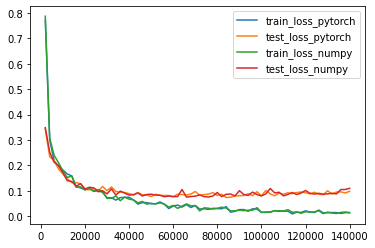

In [30]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_8_5_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the `pytorch` network on the 10000 test images: %d %%' % (
        100 * correct / total))

correct = 0
total = 0

for data in testloader:
    images, labels = data

    images = (images.reshape(batch_size, 784)).numpy()
    labels = labels.numpy()

    outputs = m_8_5_4.forward(images)
    predicted = np.argmax(outputs, axis=1)
    total += labels.shape[0]
    correct += (predicted == labels).sum().item()

print('Accuracy of the `numpy` network on the 10000 test images: %d %%' % (
        100 * correct / total))

# Plot the loss graphs for PyTorch model and your model (train and test losses should be on the same plot) 
# and comment on differences (if any) between two models and between Adam and the previous optimization techniques.

x_axis = np.arange(2000, 2000*(len(test_loss_numpy_8_5_4)+1), 2000)

plt.plot(x_axis, train_loss_pytorch_8_5_4, label = "train_loss_pytorch")
plt.plot(x_axis, test_loss_pytorch_8_5_4, label = "test_loss_pytorch")
plt.plot(x_axis, train_loss_numpy_8_5_4, label = "train_loss_numpy")
plt.plot(x_axis, test_loss_numpy_8_5_4, label = "test_loss_numpy")

plt.legend()
plt.show()

Adams gets us the best accuracy amongst all methods. 

This is because Adam takes into account the first and second moments before updating the parameters and adjusts the bias accordinly unlike the other optimizers. This reduces the iteration numbers and finds the best hyperparameters faster. 